<h1><center><b>Deep Learning for Machine Perception</b></center></h1>
<h3><center>Exercise 2</center></h3>

Your Names:  
<font color='red'>
Yuval Saadaty, 205956634  
Erel Shtossel, 316297696  
</font>


____________

In this exercise we learn to:
1. Load and preprocess datasets using pytorch.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using Pytorch.
3. Implement and train a convolutional neural network (CNN) on MNIST.

**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- For questions regarding the assignment send a mail to: ‫biu.cs.896874@gmail.com‬  

### **1. Setup**
Before running code on Colab:
- Go to "Runtime" -> "Change runtime type", and make sure to choose "GPU" for Hardware accelerator.
- Check your Python version at the command line by running "!python --version". It should be Python 3.6 by default.
- Upload all files of this assignment (code and datasets) to your Drive (e.g "deep_perception/assignments/assignment2") and mount that data to the machine. See the next cell below.  
In principle, it is also possible to upload files to the local disk of the colab machines. However, such files will be deleted when the machine is restarted (not a frequent event).

In [ ]:
# check python version
!python --version

Python 3.6.9


In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'deep_perception/assignments/assignment2/'
FOLDERNAME = 'deep_perception/assignments/'
ASSIGNMENTNAME = 'assignment2'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


### **2. Dataset**

In this exercise, we are going to build a neural network that identify handwritten digits. We will use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels and there are 10 different digits. The network will take these images and predict the digit in them.





Let's visualize the data before working with it.  
1. We can use the "torchvision" package to download the trainset. Set ```transform``` as to be the transform function below (It normalizes each image) and ```train=True```.
2. We use torch.utils.data.DataLoader to load the data. Set ```batch_size=64```.

In [2]:
# load packages
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
data_path = "./MNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the data
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw


Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Using the ```mnist_data``` (dataset) and ```mnist dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data. 
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.

In [5]:
# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = dataiter.next()

# 1. Print the number of samples in the whole dataset.
print("The number of samples in the whole dataset:")
amount_samples = len(mnist_dataloader.dataset)
print(amount_samples)

# 2. Print the number of samples in a single batch.
print("number of samples in a single batch:")
print(mnist_dataloader.batch_size)

# 3. Print the shape of images in the data (image dimensions).
print("the shape of images in the data:")
print(batch_images[0][0].shape)

# 4. Print the number of labels in the whole dataset (using the targets in the dataloader).
print("the number of labels in the whole dataset")
print(mnist_dataloader.dataset.targets.size())





The number of samples in the whole dataset:
60000
number of samples in a single batch:
64
the shape of images in the data:
torch.Size([28, 28])
the number of labels in the whole dataset
torch.Size([60000])



Labels: tensor([3, 9, 2])


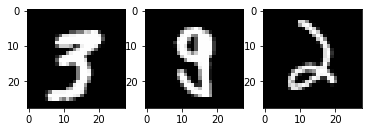

In [6]:
# 5. plot three images and print their labels
idx = np.random.choice(range(64),3) # three rundom indices
plt.subplot(1,3,1)
plt.imshow(batch_images[idx[0]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(batch_images[idx[1]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(batch_images[idx[2]].numpy().squeeze(), cmap='Greys_r')
print("Labels:",batch_labels[idx])

### **3. Neural Network - Architecture**

In the next section, we are going to implement a neural network with pytorch that gets mnist images and recognize the digit in them.  

Network Architecture (see image below): **784 input units**, a hidden layer with **128 units** and a **ReLU activation**, then a hidden layer with **64 units** and a **ReLU activation**, and finally an **output layer** with a **log-softmax activation**.

Note: Since simple neural networks get vectors as inputs, and not images (unlike CNNs), we should flatten the data. Each sample with shape (28,28) becomes (784,). That is why the input layer has 784 units.  


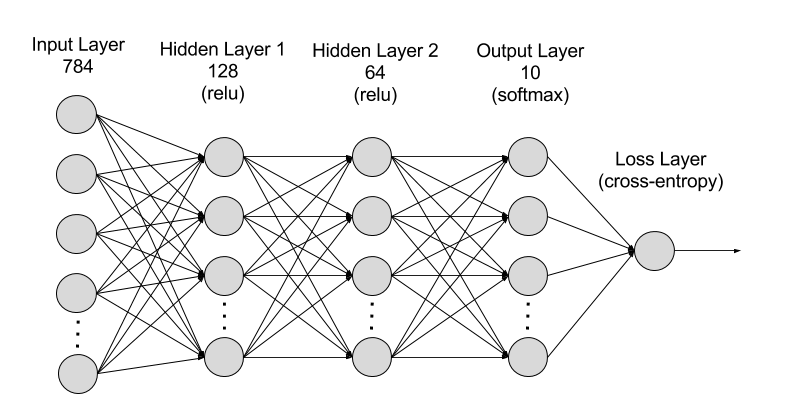

Complete the code below: The constructor (```__init___```) should contain defenitions of layers like ```Linear``` or ```Relu```. The ```forward``` function should contain the logic between the layers declared in the constructor.  

For this section, as well as the next section, you can follow online tutorials (like **[this great tutorial](https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/)** or **[this one](https://www.marktechpost.com/2019/11/09/create-a-neural-network-with-pytorch/)**) to understand how to implement neural networks with pytorch.

In [7]:
from torch import nn, optim
import torch.nn.functional as F

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        pass
        
    def forward(self, x):
        ''' Forward pass through the network, returns log_softmax values '''
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)
        

model = NeuralNetwork()
model

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Now that we have a network, let's see what happens when we pass in an image.  
Let's choose a random image and pass it through the network. It should return a prediction - confidences for each class. The class with the highest confidence is the prediction of the model for that image.   
We visualize the results using ```view_classify``` function below.

In [9]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    image - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [10]:
def random_prediction_example(data_loader, model):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = dataiter.next()
  images.resize_(64, 1, 784)
  img = images[0]

  # Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
      ps = model(img)
      # the network outputs log-probabilities, so take exponential for probabilities
      ps = torch.exp(ps)
  
  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)

  return ps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


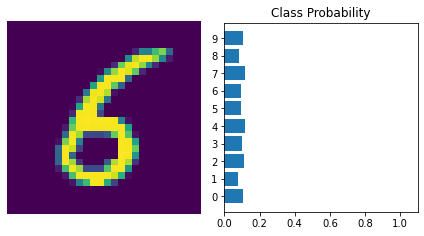

In [11]:
# you can run this cell multiple times for different images
preds_conf = random_prediction_example(mnist_dataloader, model)

Print the prediction of the network for that sample:

In [12]:
  max_number = 0
  max_prob=0
  ps_numpy = preds_conf.numpy()
  for i in range(10):
    if ps_numpy[0][i] > max_prob:
      max_prob = ps_numpy[0][i]
      max_number = i

  print(max_number)

7


### **4. Neural Network - Training**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest (20%).
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.003``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set. 
7. During training, for each epoch, track the training loss and validation loss.

In [13]:
from torch.utils import data
from torch.utils.data import Dataset, DataLoader


In [14]:
# 1. split trainset into train and validation (use torch.utils.data.random_split())
train_size = int(0.8 * len(mnist_dataloader.dataset))
test_size = len(mnist_dataloader.dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(mnist_dataloader.dataset, [train_size, test_size])

# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)


In [15]:
# 3. set hyper parameters
learning_rate = 0.003
nepochs = 5

In [16]:
model = NeuralNetwork()

# 4. create sgd optimizer. It should optimize our model parameters with
#    learning_rate defined above
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# 5. create a criterion object. It should be negative log-likelihood loss since the task
#    is a multi-task classification (digits classification)
criterion = nn.NLLLoss()

In [17]:
# 6.1. Train the model. (Fill empty code blocks)
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer 
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array. 
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      correct =0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode
          optimizer.zero_grad()          
          net_out = model(images)
          loss = criterion(net_out, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)
                  net_out_v = model(images)
                  
                  running_val_loss +=  criterion(net_out_v, labels)
                  """
                  pred = net_out_v.data.max(1)[1]  # get the index of the max log-probability
                  correct += pred.eq(labels.data).sum()   
                  # val_loss = ...
                  """

          
          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
          try:
            print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=is_image_input)}")
          except:
            pass
  return train_losses, val_losses

In [18]:
  # 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1/5..  Training Loss: 0.718..  Validation Loss: 0.362.. 
Epoch: 2/5..  Training Loss: 0.307..  Validation Loss: 0.274.. 
Epoch: 3/5..  Training Loss: 0.245..  Validation Loss: 0.236.. 
Epoch: 4/5..  Training Loss: 0.200..  Validation Loss: 0.198.. 
Epoch: 5/5..  Training Loss: 0.171..  Validation Loss: 0.180.. 


If you implemented everything correctly, you should see the training loss drop with each epoch.

8. Plot train loss and validation loss as a function of epoch. **On the same graph!**

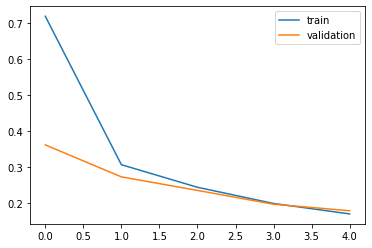

In [19]:
# plot train and validation loss as a function of #epochs
plt.plot(train_losses,label="train")
plt.plot(val_losses,label= "validation")
plt.legend()
plt.show()

With the network trained, we can check out it's predictions:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[1.5989e-05, 9.5906e-08, 5.8215e-07, 1.4163e-05, 2.1184e-06, 2.9507e-04,
         7.4568e-10, 9.9691e-01, 2.0553e-06, 2.7623e-03]])

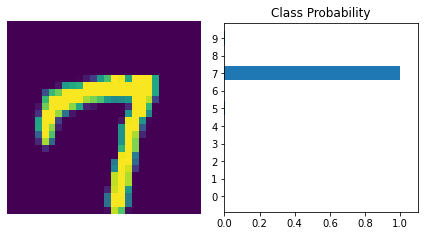

In [20]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, model)

Calculate the model's accuracy on the validation-set.

In [21]:
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      for images, labels in val_loader:
          if is_image_input:
            # flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          log_ps = model(images)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)
          
          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [ ]:
print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=True)}")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Validation accuracy: 0.9445833563804626


### **5. Convolutional Neural Networks**

In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

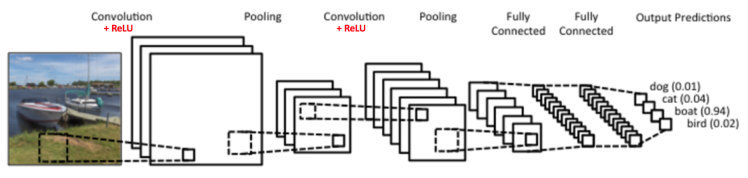

Reminder:  
Go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed. 

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters) without padding?

**A1:**
<font color='red'>
24x24x10 
</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding?


**A2:** 
<font color='red'>
P=2  
</font>

**Q3:** Given an image with width $W_{in}$, height $H_{in}$, and a convolution layer with padding $P$, stride $S$ and filter size $F$. Write a formula for the width $W_{out}$ and a formula for the height $H_{out}$ of the convolution's output.   
(In other words, what will be the width and the height of the output?).

**A3:** 
<font color='red'>
$$
W_{out} = \frac {( W_{in} - F + 2P)}{S}+1
$$

$$
H_{out} = \frac {( H_{in} - F + 2P)}{S}+1
$$
</font>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [ ]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__() 
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu 
        x = self.conv2(x) # conv 2
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)
 

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [ ]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.01

In [ ]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 1.328..  Validation Loss: 0.347.. 
Validation accuracy: 0.8970833420753479
Epoch: 2/3..  Training Loss: 0.257..  Validation Loss: 0.214.. 
Validation accuracy: 0.937749981880188
Epoch: 3/3..  Training Loss: 0.173..  Validation Loss: 0.168.. 
Validation accuracy: 0.9504166841506958


In [ ]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.9504166841506958


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set. 

You should consider changing:  
1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

2. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs

In [22]:
## Find network and hyperparams that achieve best validation accuracy as possible

class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__() 
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
        self.batchNorm1 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.batchNorm2 = nn.BatchNorm2d(64)
        self.batchNorm3 = nn.BatchNorm1d(128)

        #sels.x = nn.BatchNormalization()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.relu(x) # relu
        x = self.batchNorm1(x) #BatchNormalization
        x = self.conv2(x) # conv 2
        x = F.relu(x) # relu 
        x = self.batchNorm1(x) #BatchNormalization
        x = F.max_pool2d(x, 2) # max pooling 1
        x = self.batchNorm1(x) #BatchNormalization
        x = F.dropout(x, p = 0.4)

        x = self.conv3(x) # conv 3
        x = F.relu(x) # relu 
        x = self.batchNorm2(x) #BatchNormalization
        x = self.conv4(x) # conv 4
        x = F.relu(x) # relu
        x = self.batchNorm2(x) #BatchNormalization
        x = F.max_pool2d(x, 2) # max pooling 2
        x = self.batchNorm2(x) #BatchNormalization
        x = F.dropout(x, p = 0.3)

       
        x = x.view(-1, 1024) # flatten input

        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.batchNorm3(x) #BatchNormalization
        x = F.dropout(x, p = 0.3)
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)
 

ConvolutionalNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# New Section

Epoch: 1/35..  Training Loss: 0.143..  Validation Loss: 0.071.. 
Validation accuracy: 0.9800833463668823
Epoch: 2/35..  Training Loss: 0.058..  Validation Loss: 0.061.. 
Validation accuracy: 0.9818333387374878
Epoch: 3/35..  Training Loss: 0.045..  Validation Loss: 0.048.. 
Validation accuracy: 0.9857500195503235
Epoch: 4/35..  Training Loss: 0.036..  Validation Loss: 0.042.. 
Validation accuracy: 0.987333357334137
Epoch: 5/35..  Training Loss: 0.032..  Validation Loss: 0.038.. 
Validation accuracy: 0.9886666536331177
Epoch: 6/35..  Training Loss: 0.030..  Validation Loss: 0.045.. 
Validation accuracy: 0.987333357334137
Epoch: 7/35..  Training Loss: 0.027..  Validation Loss: 0.040.. 
Validation accuracy: 0.9889166951179504
Epoch: 8/35..  Training Loss: 0.025..  Validation Loss: 0.040.. 
Validation accuracy: 0.9879999756813049
Epoch: 9/35..  Training Loss: 0.022..  Validation Loss: 0.038.. 
Validation accuracy: 0.9879166483879089
Epoch: 10/35..  Training Loss: 0.022..  Validation Loss: 

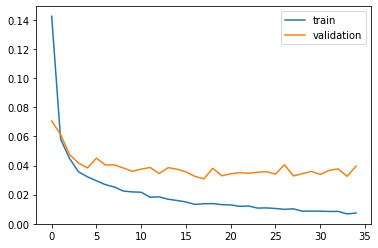

In [23]:
# save the best model in this variable

# set hyperparameters
cnn_nepochs = 35
cnn_learning_rate = 0.01

# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate, momentum=0.9)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

plt.plot(train_losses,label="train")
plt.plot(val_losses,label= "validation")
plt.legend()
plt.show()

best_model = cnn_model

When you are satisfied with your model performance on the validation set, load the test set given to you (the samples are already normalized), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Upload the file to the "submit" system with this notebook.**

Make sure that each prediction will be printed in a new line.

For Example ("predictions.txt"): 
```
0  
5  
9 
``` 

<font color='blue'><b>
Note: Bonus points will be given for the top 10 submissions having the highest test accuracy:
- Top 1-3 get 5 points 
- Top 4-6 get 3 points 
- top 7-10 get 2 points  
</b></font>  

In [24]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=32, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [25]:
# run this to save test predictions to "predictions.txt"
predict_and_save(best_model, test_path=f"{ASSIGNMENTNAME}/mnist_test.pth", file_name="predictions.txt")